In [1]:
#%pip install mlxtend
import pandas as pd


y_train= pd.read_csv("../train-test/y_train.csv")
y_test= pd.read_csv("../train-test/y_test.csv")




In [2]:
#data_stats= pd.DataFrame({'Score': 0, 'Bias':0, 'Variance':0, 'MSE':0}, index=['DecisionTreeRegressor'])


In [3]:
#funzione che calcola varianza, MSE  e score di un modello per ogni largezzza del dataset(short,medium,large)
def model_analysis(model):
    print("enter")
    from sklearn.metrics import mean_squared_error
    import pandas as pd
    import numpy as np
    import pickle
    y_test = pd.read_csv("../train-test/y_test.csv")
    
    model_name= model.__class__.__name__

    lenght= ['short','medium', 'large']
    
    for l  in lenght:
        #caricameto del modello salvato in precedenza
        loaded_model = pickle.load(open(f'../data/{model_name}/{l}.sav', 'rb'))
        data = pd.read_csv(f"../data/stasts_{l}_col.csv",index_col=0)
        
        X_test= pd.read_csv(f"../train-test/X_test_{l}.csv",index_col=0)
        #calcolo dello score
        score = loaded_model.score(X_test, y_test)
        y_pred = np.exp(loaded_model.predict(X_test))
        #calcolo del MSE
        mse = mean_squared_error(np.exp(y_test.values.ravel()), y_pred)
        #calcolo della varianza
        var =np.var(np.abs(np.exp(y_test.values) - y_pred))

        #metodo con bias_variamce_decomp -> simula il modello per n rounds quindi non può essere presalvato, problema di tempo
        #mse, bias, var = bias_variance_decomp(loaded_model, X_train.values,  y_train.values.ravel(),X_test.values, y_test.values.ravel(), loss='mse', num_rounds=20)

        #salvataggio dei dati ricavati in un csv per il confronto con gli altri modelli
        data.loc[f"{model_name}", ['MSE', 'Variance', 'Score']]= [round(mse,3), round(var,3), round(score,3)] 
        data.sort_values(by='name',axis=0)
        data.to_csv(f'../data/stasts_{l}_col.csv', index=True, index_label='name')
        print(data)
    


In [4]:
#funzione per il salvataggio dei modelli in formato .sav
def save_regressor(model):
    import pickle
    lenght= ['short','medium', 'large']

    for l  in lenght:
        X_train= pd.read_csv(f"../train-test/X_train_{l}.csv",index_col=0)
        y_train= pd.read_csv(f"../train-test/y_train.csv")
        model.fit(X_train,y_train.values.ravel())
        filename = f'../data/{model.__class__.__name__}/{l}.sav'
        pickle.dump(model, open(filename, 'wb'))

In [5]:
stasts_medium = pd.read_csv("../data/stasts_medium_col.csv",index_col=0)
stasts_short = pd.read_csv("../data/stasts_short_col.csv",index_col=0)
stasts_large = pd.read_csv("../data/stasts_large_col.csv",index_col=0)


In [6]:
#stampa del grafico dato il  valore forniti(mse,score o variance) mostrando le differenza trai modelli e come si comportano a seconda della feature selection
def print_difference(value):
    import numpy as np
    import matplotlib.pyplot as plt

    N=3
    ind = np.arange(N) 
    width = 0.1

    sl = stasts_large[value]
    sm = stasts_medium[value]
    ssh= stasts_short[value]

    tot=pd.DataFrame( [sl,sm,ssh],index= ['SHORT', 'MEDIUM', 'LARGE'])
    #funizone labda per trovare il max o il min della variabile value
    lambda_res = lambda x : pd.concat([tot.idxmax() ,tot.max()],axis=1) if x==0 and value=='Score' else pd.concat([tot.idxmin() ,tot.min()],axis=1)

    #palette di colori
    colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"]

    dt = [sl[0],sm[0],ssh[0]]
    dt_bar = plt.bar(ind, dt, width, color = colors[0])

    knn = [sl[1],sm[1],ssh[1]]
    knn_bar = plt.bar(ind+width, knn, width, color= colors[1])

    light = [sl[2],sm[2],ssh[2]]
    light_bar = plt.bar(ind+width*2, light, width, color = colors[2])

    linear = [sl[3],sm[3],ssh[3]]
    linear_bar = plt.bar(ind+width*3, linear, width, color = colors[3])

    rf = [sl[4],sm[4],ssh[4]]
    rf_bar = plt.bar(ind+width*4, rf, width, color = colors[4])

    res= lambda_res(0)
    #funzione per trovare il valore migliore a seconda di "value"
    best_line, best_model, best_data = (np.max(tot.max().max()),res[1].idxmax(),res.loc[res[1].idxmax()][0] )if value == 'Score'else (tot.min().min(), res[1].idxmin(), res.loc[res[1].idxmin()][0] )  
    
    plt.xlabel("dataset_size")
    plt.ylabel(value)
    plt.title(f"Regressor {value}")
    
    plt.xticks(ind+width,tot.index)
    #linea che rappresenta il valore migliore
    plt.axhline(y= best_line, color='r', linestyle='--')
    plt.legend( (dt_bar, knn_bar,light_bar, linear_bar,rf_bar), ('DecisionTree', 'KNN', 'Light', 'Linear', "RandomForest"), bbox_to_anchor=(1, 1.02), )
    plt.grid()
    plt.autoscale(tight=False)

    plt.show()

    print(f"best {value}: {best_line} in the : {best_model} model with {best_data} dataset \n")
    res= lambda_res(1)

    #funzione per trovare il valore peggiore a seconda di "value"
    worst_line, worst_model, worst_data =(tot.min().min(), res[1].idxmin(), res.loc[res[1].idxmin()][0] ) if value == 'Score'else(np.max(tot.max().max()),res[1].idxmax(),res.loc[res[1].idxmax()][0] )   

    print(f"worst {value}: {worst_line} in the : {worst_model} model with {worst_data} dataset \n")



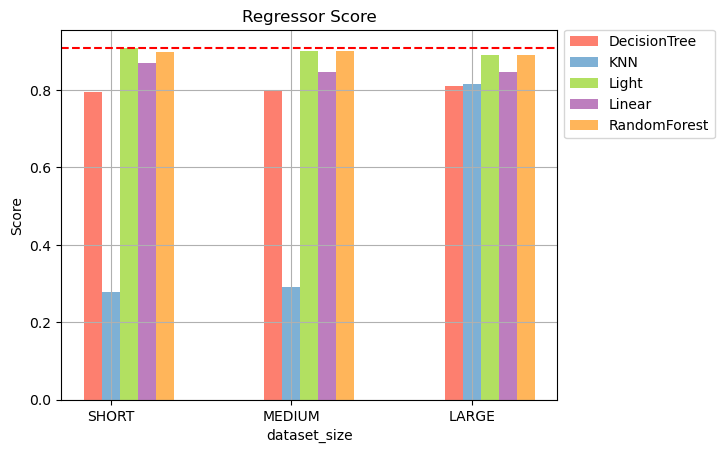

best Score: 0.91 in the : LGBMRegressor model with SHORT dataset 

worst Score: 0.278 in the : KNeighborsRegressor model with SHORT dataset 



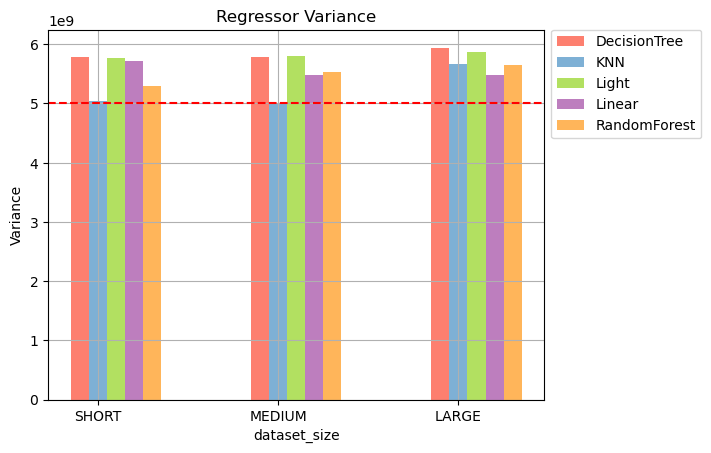

best Variance: 5000611442.693 in the : KNeighborsRegressor model with MEDIUM dataset 

worst Variance: 5944219564.702 in the : DecisionTreeRegressor model with MEDIUM dataset 



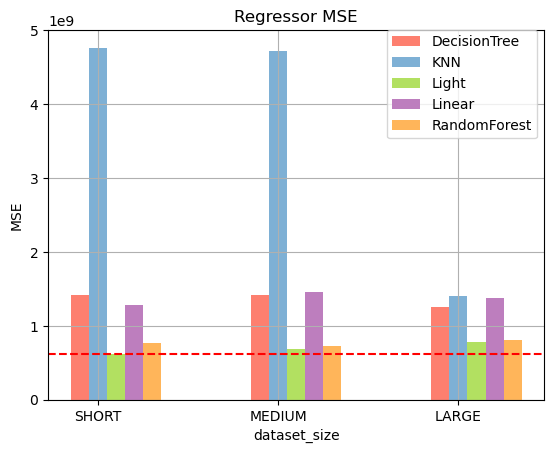

best MSE: 614381260.309 in the : LGBMRegressor model with SHORT dataset 

worst MSE: 4767924010.494 in the : KNeighborsRegressor model with LARGE dataset 



In [7]:
print_difference('Score')
print_difference('Variance')
print_difference('MSE')